In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Linear regression with regularization

In [74]:
x = np.array(range(1, 7))
y = np.array([2, 3, 8, 13, 12, 28])
y = y.astype(np.float32)
y_ = x**2

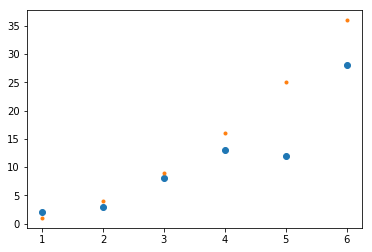

In [75]:
plt.plot(x, y, 'o', x, y_, '.')
plt.show()

In [82]:
x_ext = np.array([[1, np.sqrt(x), x, x**2, x**3] for x in x])
x_ext = tf.to_float(x_ext)
x_ext

<tf.Tensor 'ToFloat_19:0' shape=(6, 5) dtype=float32>

In [95]:
# np.shape(x_ext)[1] is 5 columns
# no bias needed, since it is the first column
W = tf.Variable(tf.zeros([np.shape(x_ext)[1], 1]), name="weights")

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    y_predicted = tf.matmul(x_ext, W)
    loss = tf.reduce_sum(tf.squared_difference(tf.to_float(y), y_predicted))
    
    learning_rate = 1E-6
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    training_steps = 100000
    for step in range(training_steps):
        sess.run([train_op])
        if step % 10000 == 0:
            print("loss: %s" % sess.run([loss]))
            
            a = [x/100.0 for x in range(100, 700, 1)]
            a_ext = np.array([[1, np.sqrt(x), x, x**2, x**3] for x in a])
            
            wghts = sess.run(W)
            b = np.matmul(a_ext, wghts)
            fig.plot(a, b, '-')
            fig.draw()
            
    wghts = sess.run(W)
        
wghts
        

loss: [4976.6533]


d:\app\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


AttributeError: 'Figure' object has no attribute 'plot'

In [90]:
a = [x/100.0 for x in range(100, 700, 1)]
a_ext = np.array([[1, np.sqrt(x), x, x**2, x**3] for x in a])
b = np.matmul(a_ext, wghts)

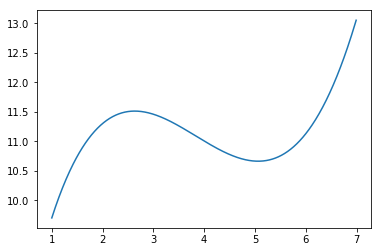

In [91]:
plt.plot(a, b, '-')
plt.show()